# Used car price prediction

## Importing required libraries

In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [352]:
import warnings
warnings.filterwarnings('ignore')

In [353]:
os.chdir(r'C:\Users\rakes\OneDrive\Desktop\Data Sets')
os.listdir()

['07 Customer Churn Case Study Data (1).xlsx',
 'adult.csv',
 'Amazon_Products.csv',
 'BankChurners.csv',
 'boston.csv',
 'CarPrice_Assignment.csv',
 'CarPrice_Assignment_train_unclean.csv',
 'Cleaned car.csv',
 'crime.csv',
 'dataset (1).csv',
 'DatingAppReviewsDataset.csv',
 'fake_job_postings.csv',
 'Iris.csv',
 'LinearRegression_model.pkl',
 'ML PROJECT',
 'netflix_titles.csv',
 'quikr_car.csv',
 'Reddit_Data.csv',
 'titanic.csv',
 'Twitter_Data.csv',
 'Y_test']

In [354]:
car_df=pd.read_csv('quikr_car.csv')

In [355]:
car_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [356]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [357]:
car_df.duplicated().sum()

94

## Data Cleaning

In [358]:
car_df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [359]:
# Variable year read as object and has many non-year values in it

In [360]:
car_df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [361]:
# Variable price read as object and has a value extra called 'Ask for price'

In [362]:
car_df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [363]:
car_df['kms_driven'].isnull().sum()

52

In [364]:
# Variable kms_driven has null values and read as object

In [365]:
car_df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [366]:
car_df['fuel_type'].isnull().sum()

55

In [367]:
# Variable fuel_type has some null values

In [368]:
backup_df=car_df.copy()

### year feature

In [369]:
car_df['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [370]:
car_df['year'].str.isnumeric()

0       True
1       True
2       True
3       True
4       True
       ...  
887    False
888     True
889     True
890     True
891     True
Name: year, Length: 892, dtype: bool

In [371]:
car_df=car_df[car_df['year'].str.isnumeric()]

In [372]:
car_df['year']=car_df['year'].astype('int')

### Price feature

In [373]:
car_df['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [374]:
car_df=car_df[car_df['Price']!='Ask For Price']

In [375]:
car_df['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [376]:
car_df['Price'].str.replace(',','')

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: object

In [377]:
car_df['Price']=car_df['Price'].str.replace(',','')

In [378]:
car_df['Price']=car_df['Price'].astype('int')

In [379]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


### kms_driven feature

In [380]:
car_df['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [381]:
car_df['kms_driven']=car_df['kms_driven'].str.split(' ').str.get(0)
car_df['kms_driven']

0        45,000
1            40
3        28,000
4        36,000
6        41,000
         ...   
886    1,32,000
888      27,000
889      40,000
890      Petrol
891      Petrol
Name: kms_driven, Length: 819, dtype: object

In [382]:
# Splitting the two element with space between them and taking the first element

In [383]:
car_df['kms_driven']=car_df['kms_driven'].str.replace(',','')
car_df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [384]:
#Removing the records which are non-numeric for kms_driven

In [385]:
car_df=car_df[car_df['kms_driven'].str.isnumeric()]

In [386]:
car_df['kms_driven']=car_df['kms_driven'].astype('int')

In [387]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


### feul_type feature

In [388]:
#Removing a record which has a single missing value for fuel_type feature

In [389]:
car_df[car_df['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [390]:
car_df=car_df[~car_df['fuel_type'].isna()]

In [391]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


### name feature

In [392]:
#Splitting the tokens using space

In [393]:
car_df['name'].str.split(' ')

0        [Hyundai, Santro, Xing, XO, eRLX, Euro, III]
1                        [Mahindra, Jeep, CL550, MDI]
3      [Hyundai, Grand, i10, Magna, 1.2, Kappa, VTVT]
4              [Ford, EcoSport, Titanium, 1.5L, TDCi]
6                                        [Ford, Figo]
                            ...                      
883                  [Maruti, Suzuki, Ritz, VXI, ABS]
885                  [Tata, Indica, V2, DLE, BS, III]
886                          [Toyota, Corolla, Altis]
888                          [Tata, Zest, XM, Diesel]
889                            [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [394]:
#Slicling the entire ekement for obtaining three tokens

In [395]:
car_df['name'].str.split(' ').str.slice(0,3)

0         [Hyundai, Santro, Xing]
1         [Mahindra, Jeep, CL550]
3           [Hyundai, Grand, i10]
4      [Ford, EcoSport, Titanium]
6                    [Ford, Figo]
                  ...            
883        [Maruti, Suzuki, Ritz]
885            [Tata, Indica, V2]
886      [Toyota, Corolla, Altis]
888              [Tata, Zest, XM]
889        [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [396]:
#joining these three words by space using join method

In [397]:
car_df['name'].str.split(' ').str.slice(0,3).str.join(' ')

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [398]:
car_df['name']=car_df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [399]:
car_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [400]:
#Some reords are removed for that index numbers are not in order
#reseting the index using reset_index 

In [401]:
car_df.reset_index()

,index,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,885,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [402]:
#Removing index column
car_df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [403]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [404]:
car_df.describe([0.5,0.95,0.99])

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
50%,2013.000000,2.999990e+05,41000.000000
95%,2018.000000,1.088750e+06,103664.750000
99%,2019.000000,1.898667e+06,174590.000000
max,2019.000000,8.500003e+06,400000.000000


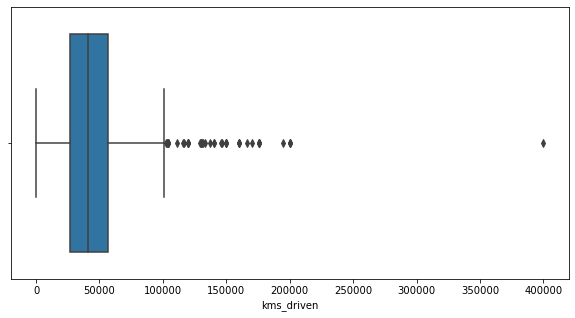

In [405]:
plt.figure(figsize=(10,5))
sns.boxplot(data=car_df,x='kms_driven');

In [406]:
car_df['kms_driven'] = np.where(car_df['kms_driven']>100000,100000,car_df['kms_driven'])

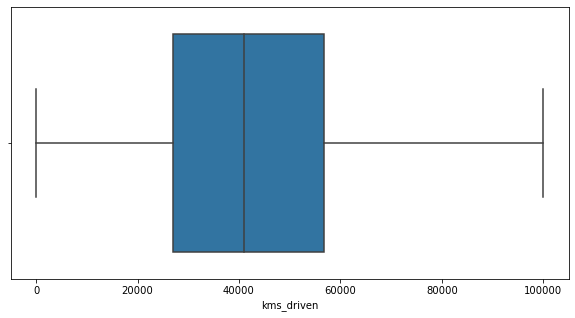

In [407]:
plt.figure(figsize=(10,5))
sns.boxplot(data=car_df,x='kms_driven');

In [408]:
car_df[car_df['Price']>6e+06]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [409]:
#Excluding the outlier
car_df=car_df[car_df['Price']<6e+06]

In [410]:
car_df=car_df.reset_index(drop=True)

In [411]:
#Storing and converting the cleaned data
car_df.to_csv('Cleaned car.csv')

## Model building

In [412]:
X=car_df.drop('Price',axis=1)
y=car_df['Price']

In [413]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,100000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [414]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

In [434]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [416]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [417]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [418]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [419]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [420]:
#OneHotEncoder transforms the columns specified and remainder='passthrough' passes the remaining columns after the previous columns transformed
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [421]:
#When the categories in X_test are not fully present in the pipe then an error is thrown, so to overcome this all the categories are specified to the column transformer 

In [422]:
lr_model=LinearRegression()

In [423]:
#make_pipeline is used to given the tranformed columns to the linearregression model
pipe=make_pipeline(column_trans,lr_model)

In [424]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [425]:
y_pred=pipe.predict(X_test)
y_pred

array([ 208418.39018813,  -14483.4877993 ,  581656.361108  ,
        367009.08780333,  212545.60440508,  515998.44108538,
        578834.11304527,  144805.08785592,  278187.68100475,
        347231.29324967,  334828.26795539,  840091.03624114,
        259813.75415885,  369895.01577247, 1269324.35111278,
        252279.66626135,  582311.36716902,  492293.19668191,
        631135.73612386,  283754.7790362 ,  391618.44508468,
        293244.01917163,  294020.50504941,  520160.87739546,
        429258.56585325,  530200.74550046,  276522.12966953,
        206038.98478014, 1014489.62404171,  258373.29988228,
        234700.60437899,  647841.78751551,  276390.28364343,
        409801.73509012,  429715.40948491,  389235.740846  ,
        587487.82931743,  -57002.13223186,  255891.47839081,
        684967.9142601 , 1560734.45183928,  413305.7279989 ,
        142717.28089108,  149000.25179318,  502246.59715497,
        267480.08688871,  284186.3496979 ,  364392.53132831,
        170736.81972064,

In [426]:
r2_score(y_test,y_pred)

0.6852225838513655

In [427]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr_model=LinearRegression()
    pipe=make_pipeline(column_trans,lr_model)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [428]:
np.argmax(scores)

661

In [429]:
max_r2_score = scores[np.argmax(scores)]
max_r2_score

0.8903685792853352

In [430]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=661)
lr_model=LinearRegression()
pipe=make_pipeline(column_trans,lr_model)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
scores.append(r2_score(y_test,y_pred))
r2_score(y_test,y_pred)

0.8903685792853352

In [431]:
import pickle
pickle.dump(pipe,open('LinearRegression_model.pkl','wb'))

In [432]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([406851.70295478])

In [433]:
print('Training accuracy of the model:',round(pipe.score(X_train,y_train)*100,2))
print('Testing accuracy of the model:',round(pipe.score(X_test,y_test)*100,2))

Training accuracy of the model: 94.37
Testing accuracy of the model: 89.04
